# Medical Imaging
## 2020-2021

### Lab 5

### Group 13:
- Alexandra Gonçalves | nº89785
- Catarina Carvalho   | nº89791
- Diogo Vieira        | nº89794
- Mariana Mourão      | nº98473

### Importing relevant libraries

In [1]:
import matplotlib.pyplot as plt
import numpy as np

### Define Constants

In [2]:
# CONSTANTS
T1 = 700e-3; # ms
T2 = 70e-3; # ms
#ratio_T1T2 = T1/T2; # ms

TE = 20e-3; # ms
TR = 200e-3; # ms 
#ratio_TETR = TE/TR; # ms

# Define time step
deltaT = 1e-3; # ms  

excitation_angle = np.pi/2; # excitation angle in rad
inversion_angle = np.pi; # inversion angle in rad

M0 = [0,0,1]; 

## 1. Evaluation of the Magnetization during one TR 

In [3]:
def magnetization_vectors(excitation_angle,inversion_angle,T1,T2,deltaT,TR,TE):
    time = np.linspace(0,TR,int(TR/deltaT) + 1);
    
    M = np.zeros((3,len(time)));
    M[:,0] = M0;
    
    # initial magnetization after excitation, at time = 0 ms 
    Mx_new = 1*M[0,0] + 0*M[1,0] + 0*M[2,0]
    My_new = 0*M[0,0] + np.cos(excitation_angle)*M[1,0] + np.sin(excitation_angle)*M[2,0]
    Mz_new = 0*M[0,0] - np.sin(excitation_angle)*M[1,0] + np.cos(excitation_angle)*M[2,0]
    M[:,1] = [Mx_new,My_new,Mz_new]; 
    
    for i in range(1, len(time)-1):
        if i*deltaT == TE/2: # magnetization after inversion (excitation by 180º)
            
            # Instantaneous excitations - no bloch equations for excitation, only rotating matrices
            Mx_new = 1*M[0,i] + 0*M[1,i]           + 0*M[2,i]
            My_new = 0*M[0,i] + np.cos(inversion_angle)*M[1,i] + np.sin(inversion_angle)*M[2,i]
            Mz_new = 0*M[0,i] - np.sin(inversion_angle)*M[1,i] + np.cos(inversion_angle)*M[2,i]
            M[:,i+1] = [Mx_new,My_new,Mz_new]
            
        else:
            # relaxation 
            Mx_new = np.exp(-deltaT/T2)*M[0,i]
            My_new = np.exp(-deltaT/T2)*M[1,i]
            Mz_new = np.exp(-deltaT/T1)*M[2,i] + 1*(1-np.exp(-deltaT/T1))
            M[:,i+1] = [Mx_new,My_new,Mz_new]
            
    return time,  M

time, M = magnetization_vectors(excitation_angle,inversion_angle,T1,T2,deltaT,TR,TE);

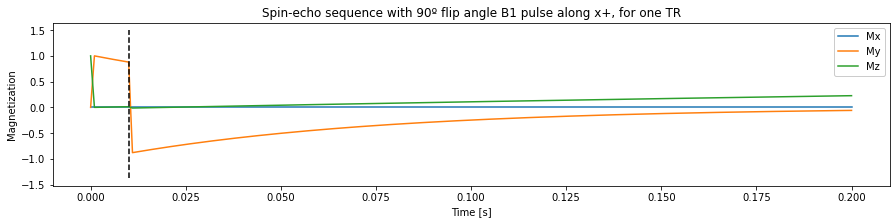

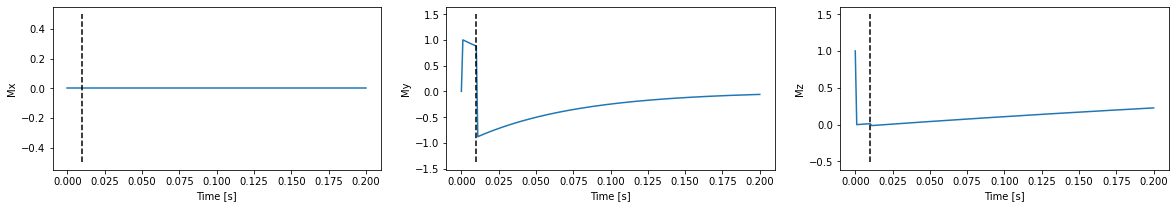

In [4]:
# RESULTS - 2D PLOTS

%matplotlib inline
plt.figure(figsize=(15,3));

plt.plot(time, M[0,:], label = 'Mx');
plt.plot(time, M[1,:], label = 'My');
plt.plot(time, M[2,:], label = 'Mz');
plt.plot([TE/2, TE/2], [np.min([M[0,:], M[1,:], M[2,:]])-0.5, np.max([M[0,:], M[1,:], M[2,:]])+0.5], 
         color='black', linestyle='dashed');

plt.xlabel('Time [s]');
plt.ylabel('Magnetization');
plt.title('Spin-echo sequence with 90º flip angle B1 pulse along x+, for one TR')
plt.legend(framealpha=1, frameon=True);
#plt.xlim(0,TR)
#plt.ylim(np.min([M[0,:], M[1,:], M[2,:]])-0.5,np.max([M[0,:], M[1,:], M[2,:]])+0.5)
plt.show()

%matplotlib inline
plt.figure(figsize=(20,3))
for i in range(3):
    plt.subplot(1,3,i+1)
    plt.plot(time,M[i,:])
    plt.plot([TE/2, TE/2], [np.min(M[i,:])-0.5, np.max(M[i,:])+0.5], color='black', linestyle='dashed');
    
    #plt.xlim(0,TR)
    #plt.ylim(np.min(M[i,:])-0.5,np.max(M[i,:])+0.5)
    plt.xlabel('Time [s]')
    if i == 0:
        plt.ylabel('Mx')
    if i == 1:
        plt.ylabel('My')
    if i == 2:
        plt.ylabel('Mz')
plt.show()

## 2. Complex Transverse Magnetization - Amplitude and Phase in time 

In [5]:
# Complex Transverse Magnetization
M_complex = np.zeros((len(M[0])),dtype=complex)

for i in range(len(M[0])):
    M_complex[i] = complex(M[0,i],M[1,i])

# Get amplitude and phase
M_abs = abs(M_complex)
M_arg = np.angle(M_complex)

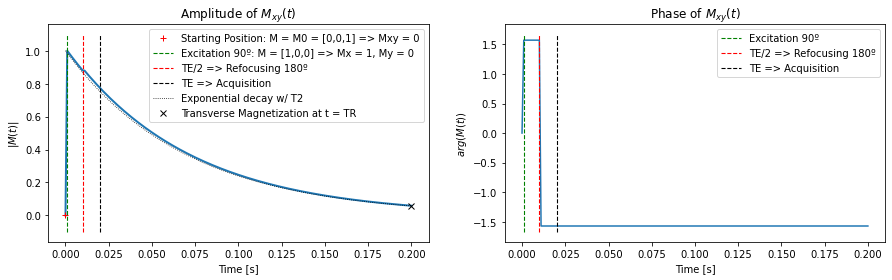

In [6]:
# RESULTS
plt.figure(figsize=(15,4))

plt.subplot(1,2,1)
plt.plot(time,M_abs,linewidth=2)
plt.xlabel('Time [s]')
plt.ylabel('$|M(t)|$')
plt.title('Amplitude of $M_{xy}(t)$')
plt.plot(time[0], M_abs[0], "+", color = 'red', label = 'Starting Position: M = M0 = [0,0,1] => Mxy = 0')
plt.plot([time[1], time[1]], [np.min(M_abs)-0.1, np.max(M_abs)+0.1], color='green', linestyle='dashed',linewidth=1.1,label = 'Excitation 90º: M = [1,0,0] => Mx = 1, My = 0')
plt.plot([TE/2, TE/2], [np.min(M_abs)-0.1, np.max(M_abs)+0.1], color='red', linestyle='dashed',linewidth=1.1,label = 'TE/2 => Refocusing 180º')
plt.plot([TE, TE], [np.min(M_abs)-0.1, np.max(M_abs)+0.1], color='black', linestyle='dashed',linewidth=1.1,label = 'TE => Acquisition')
expo = np.zeros(len(time))
for i in range(len(expo)):
    expo[i] = np.exp(-time[i]/T2)
plt.plot(time,expo, label = 'Exponential decay w/ T2', color='black', linestyle=':',linewidth=0.8)
plt.plot(time[len(time)-1], M_abs[len(M_abs)-1], "x",color='black' ,linewidth=1.1,label = 'Transverse Magnetization at t = TR')
plt.legend()

plt.subplot(1,2,2)
plt.plot(time,M_arg)
plt.xlabel('Time [s]')
plt.ylabel('$arg(M(t))$')
plt.title('Phase of $M_{xy}(t)$')
plt.plot([time[1], time[1]], [np.min(M_arg)-0.1, np.max(M_arg)+0.1], color='green', linestyle='dashed',linewidth=1.1,label = 'Excitation 90º')
plt.plot([TE/2, TE/2], [np.min(M_arg)-0.1, np.max(M_arg)+0.1], color='red', linestyle='dashed',linewidth=1.1,label = 'TE/2 => Refocusing 180º')
plt.plot([TE, TE], [np.min(M_arg)-0.1, np.max(M_arg)+0.1], color='black', linestyle='dashed',linewidth=1.1,label = 'TE => Acquisition')
plt.legend()
plt.show()

**Spin Echo with on-resonance spins**: Amplitude already decays with T2, which is the ideal cenario ("upper limit") => 180º refocusing at time TE/2 does not help us to recover any signal at time TE (echo time) because we already have the maximum possible. 

At the end of $\Delta t = 1\cdot T2$, the variation of the magnetization is equal to 63.2% when comparing to the initial value at $t = 0$. Because we're considering a time window of length $TE = 200\,ms$, at $t = 200\,ms$ the variation is equal to $1-exp(-200/70) = 94.3\%$ which explains why the transverse magnetization does not relax completely at the end of this time window.

## 3. Off-Resonance: Evaluation of the Magnetization and Complex Transverse Magnetization during one TR

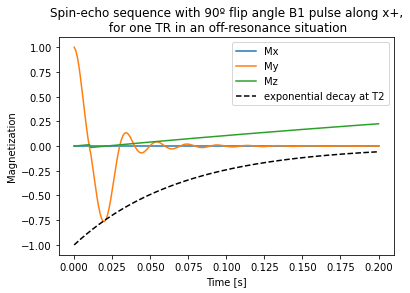

In [7]:
# REPEAT 1
#creating a new function to calculate magnetization vectors in off-resonance
def magnetization_vectors_of2(excitation_angle,inversion_angle,T1,T2,deltaT,TR,TE,M0):
    time = np.linspace(0,TR,int(TR/deltaT) + 1);
    
    M = np.zeros((3,len(time)));
    M[:,0] = M0;
    
    # initial magnetization after excitation, at time = 0 ms 
    Mx_new = 1*M[0,0] + 0*M[1,0] + 0*M[2,0]
    My_new = 0*M[0,0] + np.cos(excitation_angle)*M[1,0] + np.sin(excitation_angle)*M[2,0]
    Mz_new = 0*M[0,0] - np.sin(excitation_angle)*M[1,0] + np.cos(excitation_angle)*M[2,0]
    M[:,0] = [Mx_new,My_new,Mz_new];

    
    M_sum = np.zeros((3,len(time)))
    M_sum2 = np.array(M_sum)
    
    for j in range(-50,51):
        deltaw = 2*np.pi*j;
        for i in range(0, len(time)-1):
            if i*deltaT == TE/2: # magnetization after inversion (excitation by 180º)

                # rotation 180º about x (inversion) and then rotation about z (precession)
                prec_z = [[np.cos(deltaw*deltaT),np.sin(deltaw*deltaT),0],[-np.sin(deltaw*deltaT),np.cos(deltaw*deltaT),0],[0,0,1]]
                rot_x = [[1,0,0],[0,np.cos(inversion_angle),np.sin(inversion_angle)],[0,-np.sin(inversion_angle),np.cos(inversion_angle)]]
                M[:,i+1] = np.dot(prec_z,np.dot(rot_x,M[:,i]))                


            else:
                # relaxation and then rotation about z (precession)
                prec_z = [[np.cos(deltaw*deltaT),np.sin(deltaw*deltaT),0],[-np.sin(deltaw*deltaT),np.cos(deltaw*deltaT),0],[0,0,1]]
                expo = [[np.exp(-deltaT/T2),0,0],[0,np.exp(-deltaT/T2),0],[0,0,np.exp(-deltaT/T1)]]
                M[:,i+1] = np.dot(prec_z,np.dot(expo,M[:,i])) + [0,0,1*(1-np.exp(-deltaT/T1))]

                
        M2 = np.array(M)
        M_sum2 = M_sum2 + M2;

    return time,  M_sum2

time, M_sum = magnetization_vectors_of2(excitation_angle,inversion_angle,T1,T2,deltaT,TR,TE,M0);

M_avg = M_sum/101 #average magnetization
expo = np.zeros(len(time))

for i in range(len(expo)):
    expo[i] = -np.exp(-time[i]/T2)

plt.plot(time, M_avg[0,:], label = 'Mx');
plt.plot(time, M_avg[1,:], label = 'My');
plt.plot(time, M_avg[2,:], label = 'Mz');
plt.plot(time,expo, label = 'exponential decay at T2', color='black', linestyle='dashed')
plt.xlabel('Time [s]');
plt.ylabel('Magnetization');
plt.title('Spin-echo sequence with 90º flip angle B1 pulse along x+,\n for one TR in an off-resonance situation')
plt.legend()
plt.show()

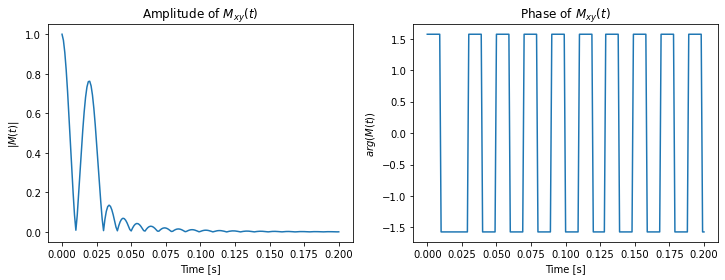

In [8]:
# REPEAT 2

# Complex Transverse Magnetization
M_complex_avg = np.zeros((len(M_avg[0])),dtype=complex)
for i in range(len(M[0])):
    M_complex_avg[i] = complex(M_avg[0,i],M_avg[1,i])

# Get amplitude and phase
M_abs_avg = abs(M_complex_avg)
M_arg_avg = np.angle(M_complex_avg)

# Results
plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
plt.plot(time,M_abs_avg)
plt.xlabel('Time [s]')
plt.ylabel('$|M(t)|$')
plt.title('Amplitude of $M_{xy}(t)$')

plt.subplot(1,2,2)
plt.plot(time,M_arg_avg)
plt.xlabel('Time [s]')
plt.ylabel('$arg(M(t))$')
plt.title('Phase of $M_{xy}(t)$')
plt.show()

## 4. Off-Resonance: Multiple Spin Echo

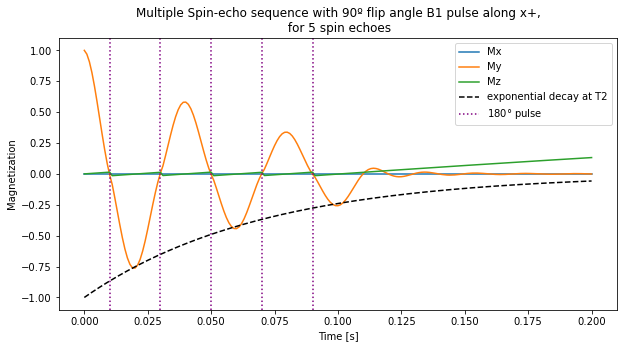

In [17]:
echo_times = [TE/2, 3*TE/2, 5*TE/2, 7*TE/2, 9*TE/2]   # times where echos will appear for an experiment with 5 echoes

def magnetization_vectors_multiple(excitation_angle,inversion_angle,T1,T2,deltaT,TR,TE,M0):
    time = np.linspace(0,TR, int((TR)/deltaT) + 1);
    
    M = np.zeros((3,len(time)));
    M[:,0] = M0;
    
    # initial magnetization after excitation, at time = 0 ms 
    Mx_new = 1*M[0,0] + 0*M[1,0] + 0*M[2,0]
    My_new = 0*M[0,0] + np.cos(excitation_angle)*M[1,0] + np.sin(excitation_angle)*M[2,0]
    Mz_new = 0*M[0,0] - np.sin(excitation_angle)*M[1,0] + np.cos(excitation_angle)*M[2,0]
    M[:,0] = [Mx_new,My_new,Mz_new];

    
    M_sum = np.zeros((3,len(time)))
    M_sum2 = np.array(M_sum)
    
    for j in range(-50,51):
        deltaw = 2*np.pi*j;
        for i in range(0, len(time)-1):
            if (i*deltaT) in echo_times: # magnetization after inversion (excitation by 180º)

                # rotation 180º about x (inversion) and then rotation about z (precession)
                prec_z = [[np.cos(deltaw*deltaT),np.sin(deltaw*deltaT),0],[-np.sin(deltaw*deltaT),np.cos(deltaw*deltaT),0],[0,0,1]]
                rot_x = [[1,0,0],[0,np.cos(inversion_angle),np.sin(inversion_angle)],[0,-np.sin(inversion_angle),np.cos(inversion_angle)]]
                M[:,i+1] = np.dot(prec_z,np.dot(rot_x,M[:,i]))                


            else:
                # relaxation and then rotation about z (precession)
                prec_z = [[np.cos(deltaw*deltaT),np.sin(deltaw*deltaT),0],[-np.sin(deltaw*deltaT),np.cos(deltaw*deltaT),0],[0,0,1]]
                expo = [[np.exp(-deltaT/T2),0,0],[0,np.exp(-deltaT/T2),0],[0,0,np.exp(-deltaT/T1)]]
                M[:,i+1] = np.dot(prec_z,np.dot(expo,M[:,i])) + [0,0,1*(1-np.exp(-deltaT/T1))]

                
        M2 = np.array(M)
        M_sum2 = M_sum2 + M2;

    return time,  M_sum2


time, M_sum = magnetization_vectors_multiple(excitation_angle,inversion_angle,T1,T2,deltaT,TR,TE,M0);

M_avg = M_sum/101 #average magnetization
expo = np.zeros(len(time))

for i in range(len(expo)):
    expo[i] = -np.exp(-time[i]/T2)
    
    
plt.figure(figsize=(10,5))
plt.plot(time, M_avg[0,:], label = 'Mx');
plt.plot(time, M_avg[1,:], label = 'My');
plt.plot(time, M_avg[2,:], label = 'Mz');
plt.plot(time,expo, label = 'exponential decay at T2', color='black', linestyle='dashed')
for times in echo_times:
    if times == TE/2:
        plt.axvline(x=times, color='purple', linestyle='dotted', label = '180$\degree$ pulse')
    else:
        plt.axvline(x=times, color='purple', linestyle='dotted')
plt.xlabel('Time [s]');
plt.ylabel('Magnetization');
plt.title('Multiple Spin-echo sequence with 90º flip angle B1 pulse along x+,\n for 5 spin echoes')
plt.legend()
plt.show()

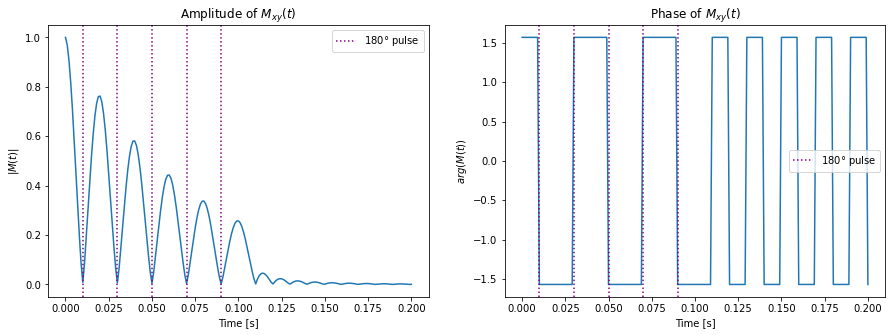

In [18]:
M_complex_avg = np.zeros((len(M_avg[0])),dtype=complex)
for i in range(len(M[0])):
    M_complex_avg[i] = complex(M_avg[0,i],M_avg[1,i])

# Get amplitude and phase
M_abs_avg = abs(M_complex_avg)
M_arg_avg = np.angle(M_complex_avg)

# Results
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
plt.plot(time,M_abs_avg)
plt.xlabel('Time [s]')
plt.ylabel('$|M(t)|$')
plt.title('Amplitude of $M_{xy}(t)$')
for times in echo_times:
    if times == TE/2:
        plt.axvline(x=times, color='purple', linestyle='dotted', label = '180$\degree$ pulse')
    else:
        plt.axvline(x=times, color='purple', linestyle='dotted')
plt.legend()


plt.subplot(1,2,2)
plt.plot(time,M_arg_avg)
plt.xlabel('Time [s]')
plt.ylabel('$arg(M(t))$')
plt.title('Phase of $M_{xy}(t)$')
for times in echo_times:
    if times == TE/2:
        plt.axvline(x=times, color='purple', linestyle='dotted', label = '180$\degree$ pulse')
    else:
        plt.axvline(x=times, color='purple', linestyle='dotted')
plt.legend()
plt.show()

#### Find T2 from the experimental points


[0.02, 0.06, 0.1, 0.124, 0.14400000000000002, 0.164, 0.184]
Estimated T2 : 0.07368421052631563 seconds


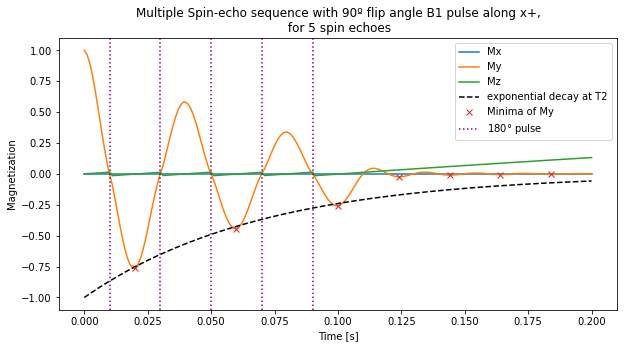

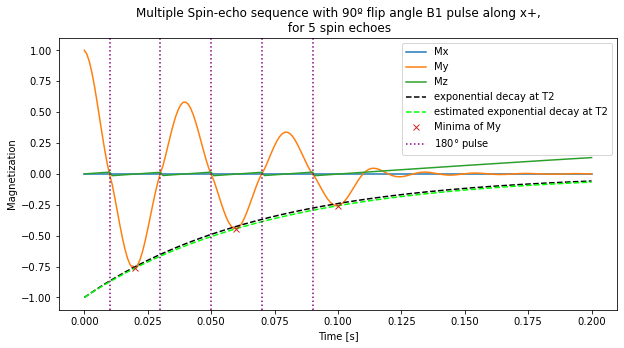

In [19]:
from scipy.signal import argrelextrema
from scipy.optimize import curve_fit

# for local minima
minpeaks = argrelextrema(M_avg[1], np.less)[0]
minpeaksAMP = M_avg[1][minpeaks]
minpeaks = [x*deltaT for x in minpeaks]
print(minpeaks)

# Save only the minima until 5*TE
minpeaks_relevant = [x for x in minpeaks if x <= 5*TE]
Minpeaks_relevant = [int(x/deltaT) for x in minpeaks_relevant]
minpeaks_relevantAMP = M_avg[1][Minpeaks_relevant]


# Fit a curve for the minima found

def fitting_function(x, T2_estimated):
    y = -np.exp(-(1/T2_estimated)*x)
    return y

popt, pcov = curve_fit(fitting_function, minpeaks_relevant, minpeaks_relevantAMP)
T2_estimated = popt[0]

estimated_expo = np.zeros(len(time))
for i in range(len(expo)):
    estimated_expo[i] = -np.exp(-time[i]/T2_estimated)

print('Estimated T2 : ' + str(T2_estimated)+ ' seconds')




#Plot
plt.figure(figsize=(10,5))
plt.plot(time, M_avg[0,:], label = 'Mx');
plt.plot(time, M_avg[1,:], label = 'My');
plt.plot(time, M_avg[2,:], label = 'Mz');
plt.plot(time,expo, label = 'exponential decay at T2', color='black', linestyle='dashed')
plt.plot(minpeaks, minpeaksAMP, "x", label = 'Minima of My')
for times in echo_times:
    if times == TE/2:
        plt.axvline(x=times, color='purple', linestyle='dotted', label = '180$\degree$ pulse')
    else:
        plt.axvline(x=times, color='purple', linestyle='dotted')
plt.xlabel('Time [s]');
plt.ylabel('Magnetization');
plt.title('Multiple Spin-echo sequence with 90º flip angle B1 pulse along x+,\n for 5 spin echoes')
plt.legend()
plt.show()

# Plot
plt.figure(figsize=(10,5))
plt.plot(time, M_avg[0,:], label = 'Mx');
plt.plot(time, M_avg[1,:], label = 'My');
plt.plot(time, M_avg[2,:], label = 'Mz');
plt.plot(time,expo, label = 'exponential decay at T2', color='black', linestyle='dashed')
plt.plot(time,estimated_expo, label = 'estimated exponential decay at T2', color='lime', linestyle='dashed')
plt.plot(minpeaks_relevant, minpeaks_relevantAMP, "x", label = 'Minima of My')
for times in echo_times:
    if times == TE/2:
        plt.axvline(x=times, color='purple', linestyle='dotted', label = '180$\degree$ pulse')
    else:
        plt.axvline(x=times, color='purple', linestyle='dotted')
plt.xlabel('Time [s]');
plt.ylabel('Magnetization');
plt.title('Multiple Spin-echo sequence with 90º flip angle B1 pulse along x+,\n for 5 spin echoes')
plt.legend()
plt.show()

Estimated T2 : 0.07368421052631562 seconds


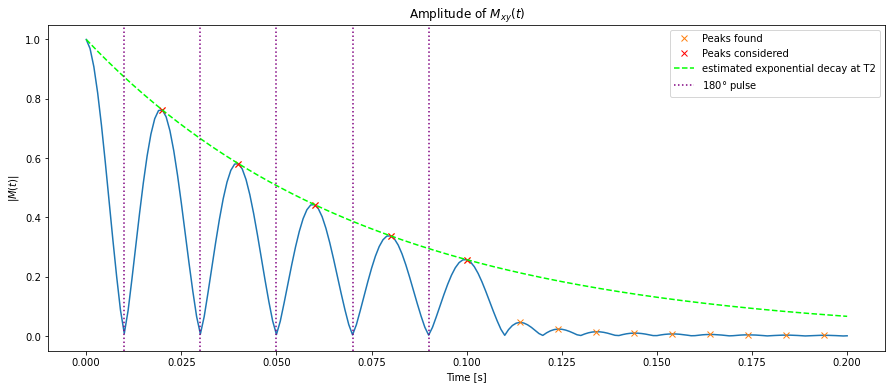

In [20]:
# for local minima
peaks = argrelextrema(M_abs_avg, np.greater)[0]
peaksAMP = M_abs_avg[peaks]
peaks = [x*deltaT for x in peaks]

# Save only the minima until 5*TE
peaks_relevant = [x for x in peaks if x <= 5*TE]  # Only 6 peaks remain
peaks_relevantAMP = peaksAMP[0:5]

# Fit a curve for the minima found
def fitting_function(x, T2_estimated):
    y = np.exp(-(1/T2_estimated)*x)
    return y

popt, pcov = curve_fit(fitting_function, peaks_relevant, peaks_relevantAMP)
T2_estimated = popt[0]

print('Estimated T2 : ' + str(T2_estimated) + ' seconds')

estimated_expo = np.zeros(len(time))
for i in range(len(expo)):
    estimated_expo[i] = np.exp(-time[i]/T2_estimated)
    

# Plot
plt.figure(figsize=(15,6))
plt.plot(time,M_abs_avg)
plt.plot(peaks, peaksAMP, "x", label = 'Peaks found')
plt.plot(peaks_relevant, peaks_relevantAMP, "x", color = 'red', label = 'Peaks considered')
plt.plot(time, estimated_expo, label = 'estimated exponential decay at T2', color='lime', linestyle='dashed')
plt.xlabel('Time [s]')
plt.ylabel('$|M(t)|$')
plt.title('Amplitude of $M_{xy}(t)$')
for times in echo_times:
    if times == TE/2:
        plt.axvline(x=times, color='purple', linestyle='dotted', label = '180$\degree$ pulse')
    else:
        plt.axvline(x=times, color='purple', linestyle='dotted')
plt.legend()